In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets .cifar10.load_data()
# first we will normalise the data
train_images, test_images = train_images / 255.0 , test_images / 255

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Text(0.5, 1.0, 'frog')

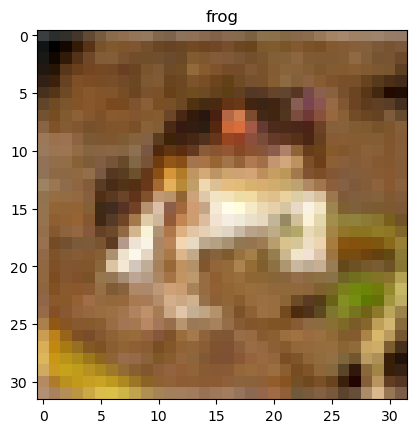

In [4]:
plt.imshow(train_images[0])
plt.title(classes[train_labels[0][0]])

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# model = Sequential()
# model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(32,32,3)))
# model.add(layers.MaxPooling2D((2,2)))
# tf.keras.layers.Dropout(0.25)

# model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
# model.add(layers.MaxPooling2D((2,2)))
# tf.keras.layers.Dropout(0.25)

# model.add(layers.Conv2D(64,(3,3),activation = 'relu')) 
# model.add(layers.Flatten())
# model.add(layers.Dense(64,activation = 'relu'))
# tf.keras.layers.Dropout(0.25)
# model.add(layers.Dense(10,activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [8]:
# import tensorflow as tf
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0.0001,
#     patience=20,
#     verbose=1,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
#     start_from_epoch=0,
# )

In [9]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

history =model.fit(train_images, train_labels, epochs=10, batch_size = 64, validation_data=(test_images, test_labels))  #batch_size=10,

Epoch 1/10
782/782 [==============================] - 60s 76ms/step - loss: 1.6544 - accuracy: 0.3893 - val_loss: 1.2337 - val_accuracy: 0.5580
Epoch 2/10
782/782 [==============================] - 61s 78ms/step - loss: 1.1603 - accuracy: 0.5858 - val_loss: 0.9746 - val_accuracy: 0.6484
Epoch 3/10
782/782 [==============================] - 61s 78ms/step - loss: 0.9569 - accuracy: 0.6612 - val_loss: 0.8827 - val_accuracy: 0.6951
Epoch 4/10
782/782 [==============================] - 61s 77ms/step - loss: 0.8382 - accuracy: 0.7055 - val_loss: 0.7546 - val_accuracy: 0.7395
Epoch 5/10
782/782 [==============================] - 60s 77ms/step - loss: 0.7534 - accuracy: 0.7364 - val_loss: 0.7240 - val_accuracy: 0.7438
Epoch 6/10
782/782 [==============================] - 61s 78ms/step - loss: 0.6943 - accuracy: 0.7561 - val_loss: 0.6887 - val_accuracy: 0.7678
Epoch 7/10
782/782 [==============================] - 61s 78ms/step - loss: 0.6363 - accuracy: 0.7754 - val_loss: 0.6715 - val_accuracy:

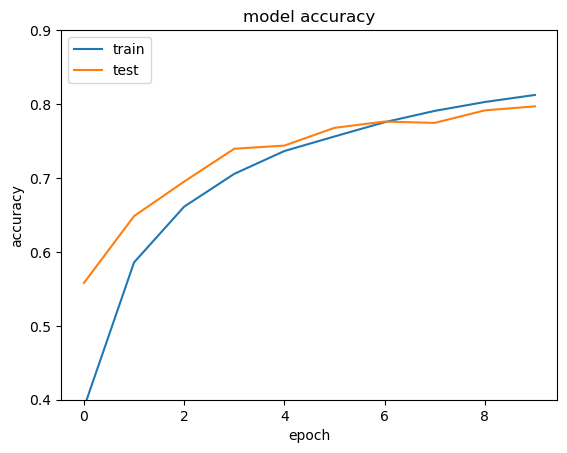

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.4,0.9)
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 4s - loss: 0.6059 - accuracy: 0.7969 - 4s/epoch - 14ms/step


In [14]:
print(test_acc)

0.7968999743461609


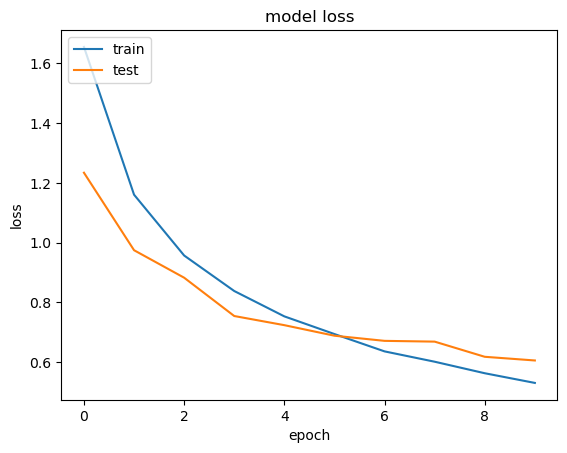

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.80, 0.88)
plt.legend(['train','test'], loc = 'upper left')
plt.show()

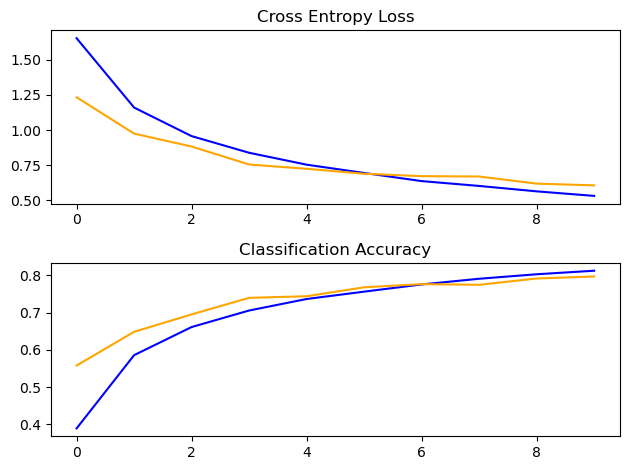

In [19]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
plt.tight_layout()